C:\Users\KIIT\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


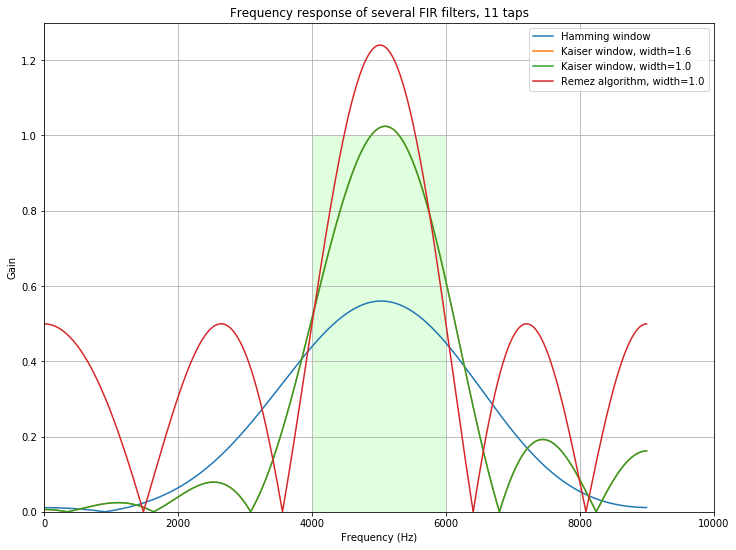

In [213]:
from scipy.signal import *

# Several flavors of bandpass FIR filters.

def bandpass_firwin(ntaps, lowcut, highcut, fs, window='hamming'):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=window, scale=False)
    return taps

def bandpass_kaiser(ntaps, lowcut, highcut, fs, width):
    nyq = 0.5 * fs
    atten = kaiser_atten(ntaps, width / nyq)
    beta = kaiser_beta(atten)
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=('kaiser', beta), scale=False)
    return taps

def bandpass_remez(ntaps, lowcut, highcut, fs, width):
    delta = 0.5 * width
    edges = [0, lowcut - delta, lowcut + delta,
             highcut - delta, highcut + delta, 0.5*fs]
    taps = remez(ntaps, edges, [0, 1, 0], Hz=fs)
    return taps


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 18000.0
    lowcut = 4000.0
    highcut = 6000.0

    ntaps = 11
    taps_hamming = bandpass_firwin(ntaps, lowcut, highcut, fs=fs)
    taps_kaiser16 = bandpass_kaiser(ntaps, lowcut, highcut, fs=fs, width=1.6)
    taps_kaiser10 = bandpass_kaiser(ntaps, lowcut, highcut, fs=fs, width=1.0)
    remez_width = 1.0
    taps_remez = bandpass_remez(ntaps, lowcut, highcut, fs=fs, width=remez_width)

    # Plot the frequency responses of the filters.
    plt.figure(1, figsize=(12, 9))
    plt.clf()

    # First plot the desired ideal response as a green(ish) rectangle.
    rect = plt.Rectangle((lowcut, 0), highcut - lowcut, 1.0,
                         facecolor="#60ff60", alpha=0.2)
    plt.gca().add_patch(rect)

    # Plot the frequency response of each filter.
    w, h = freqz(taps_hamming, 1, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Hamming window")

    w, h = freqz(taps_kaiser16, 1, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Kaiser window, width=1.6")

    w, h = freqz(taps_kaiser10, 1, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Kaiser window, width=1.0")

    w, h = freqz(taps_remez, 1, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h),
             label="Remez algorithm, width=%.1f" % remez_width)

    plt.xlim(0, 10000.0)
    plt.ylim(0, 1.3)
    plt.grid(True)
    plt.legend()
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.title('Frequency response of several FIR filters, %d taps' % ntaps)

    plt.show()

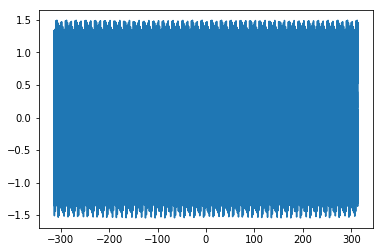

In [256]:
from matplotlib.pyplot import *
from numpy import *
import random
sample_rate = 18000.0
nsamples = 100
t = linspace(-100.*pi,100.*pi, num=100000);
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + 0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + 0.1*sin(2*pi*23.45*t+.8)
# x= sin(t) + 100*random.choice(t);
plot(t,x)
show()

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


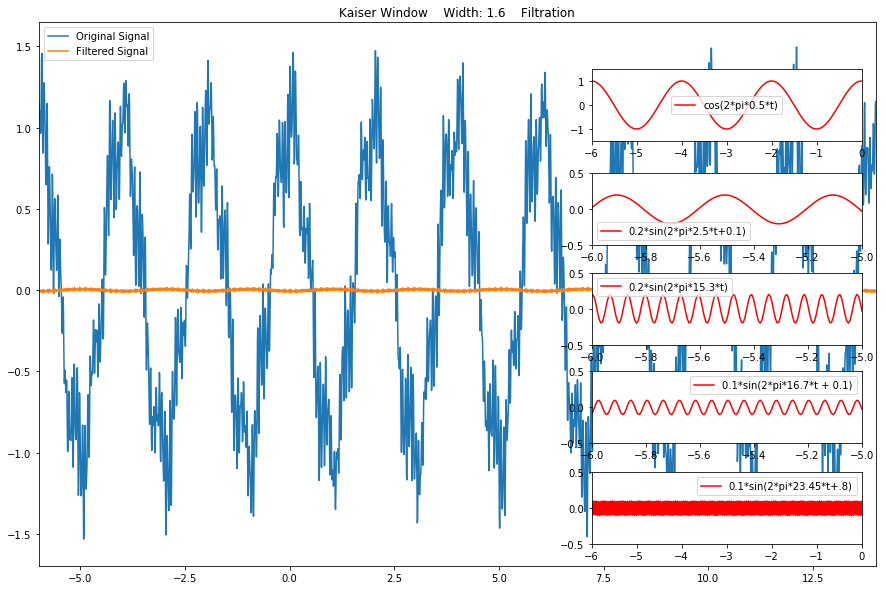

In [257]:
ultimateKaiser16= lfilter(taps_kaiser16,1.0,x)
figure(2, figsize=(15, 10))
clf()
plot(t,x,label="Original Signal")
plot(t,ultimateKaiser16,label="Filtered Signal")
xlim(-6, 14)
legend()
title("Kaiser Window    Width: 1.6    Filtration")

ax1 = axes([0.637, 0.715, .25, .1])
plot(t,(cos(2*pi*0.5*t)),label="cos(2*pi*0.5*t)", color="red")
ylim(-1.5,1.5)
xlim(-6,0)
legend()

ax2 = axes([0.637, 0.57, .25, .1])
plot(t,(0.2*sin(2*pi*2.5*t+0.1)),label="0.2*sin(2*pi*2.5*t+0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax3 = axes([0.637, 0.432, .25, .1])
plot(t,(0.2*sin(2*pi*15.3*t)),label="0.2*sin(2*pi*15.3*t)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax4 = axes([0.637, 0.295, .25, .1])
plot(t,(0.1*sin(2*pi*16.7*t + 0.1)),label="0.1*sin(2*pi*16.7*t + 0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax5 = axes([0.637, 0.155, .25, .1])
plot(t,(0.1*sin(2*pi*23.45*t+.8)),label="0.1*sin(2*pi*23.45*t+.8)", color="red")
ylim(-0.5,0.5)
xlim(-6,0)
legend()

show()

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


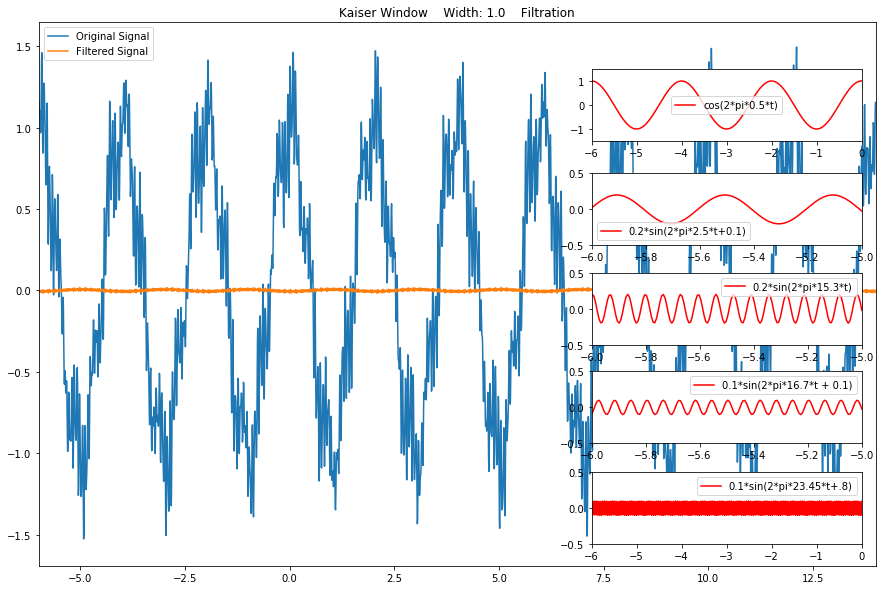

In [234]:
ultimateKaiser10= lfilter(taps_kaiser10,1.0,x)
figure(3, figsize=(15, 10))
clf()
plot(t,x,label="Original Signal")
plot(t,ultimateKaiser10,label="Filtered Signal")
xlim(-6, 14)
legend()
title("Kaiser Window    Width: 1.0    Filtration")

ax1 = axes([0.637, 0.715, .25, .1])
plot(t,(cos(2*pi*0.5*t)),label="cos(2*pi*0.5*t)", color="red")
ylim(-1.5,1.5)
xlim(-6,0)
legend()

ax2 = axes([0.637, 0.57, .25, .1])
plot(t,(0.2*sin(2*pi*2.5*t+0.1)),label="0.2*sin(2*pi*2.5*t+0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax3 = axes([0.637, 0.432, .25, .1])
plot(t,(0.2*sin(2*pi*15.3*t)),label="0.2*sin(2*pi*15.3*t)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax4 = axes([0.637, 0.295, .25, .1])
plot(t,(0.1*sin(2*pi*16.7*t + 0.1)),label="0.1*sin(2*pi*16.7*t + 0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax5 = axes([0.637, 0.155, .25, .1])
plot(t,(0.1*sin(2*pi*23.45*t+.8)),label="0.1*sin(2*pi*23.45*t+.8)", color="red")
ylim(-0.5,0.5)
xlim(-6,0)
legend()

show()

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


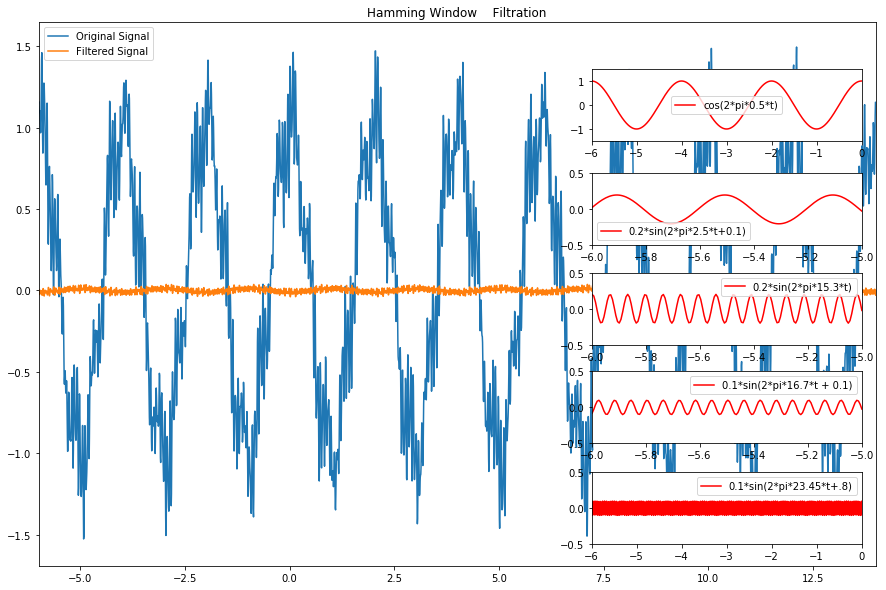

In [235]:
ultimateHamming= lfilter(taps_hamming,1.0,x)
figure(4, figsize=(15, 10))
clf()
plot(t,x,label="Original Signal")
plot(t,ultimateHamming,label="Filtered Signal")
xlim(-6, 14)
legend()
title("Hamming Window    Filtration")

ax1 = axes([0.637, 0.715, .25, .1])
plot(t,(cos(2*pi*0.5*t)),label="cos(2*pi*0.5*t)", color="red")
ylim(-1.5,1.5)
xlim(-6,0)
legend()

ax2 = axes([0.637, 0.57, .25, .1])
plot(t,(0.2*sin(2*pi*2.5*t+0.1)),label="0.2*sin(2*pi*2.5*t+0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax3 = axes([0.637, 0.432, .25, .1])
plot(t,(0.2*sin(2*pi*15.3*t)),label="0.2*sin(2*pi*15.3*t)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax4 = axes([0.637, 0.295, .25, .1])
plot(t,(0.1*sin(2*pi*16.7*t + 0.1)),label="0.1*sin(2*pi*16.7*t + 0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax5 = axes([0.637, 0.155, .25, .1])
plot(t,(0.1*sin(2*pi*23.45*t+.8)),label="0.1*sin(2*pi*23.45*t+.8)", color="red")
ylim(-0.5,0.5)
xlim(-6,0)
legend()

show()

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


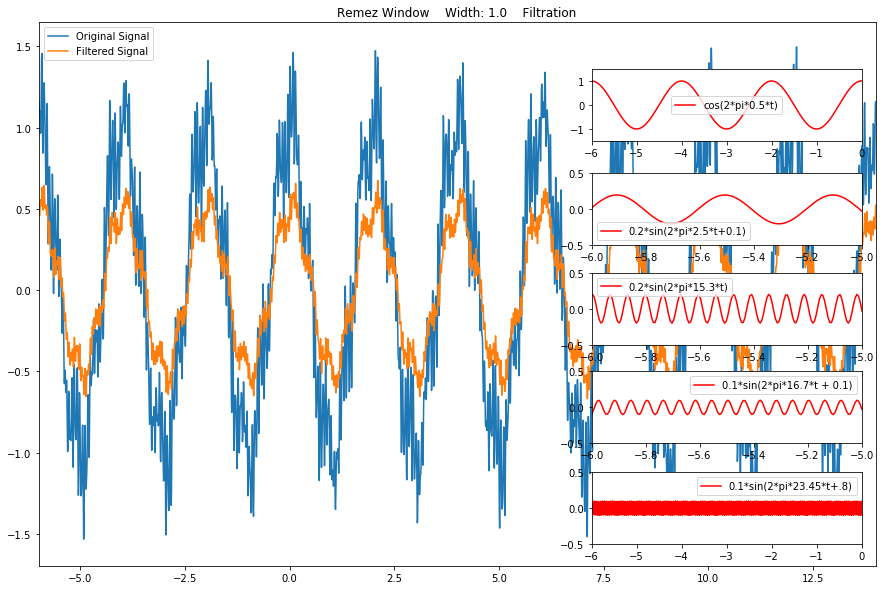

In [263]:
ultimateRemez= lfilter(taps_remez,1.0,x)
figure(5, figsize=(15, 10))
clf()
plot(t,x,label="Original Signal")
plot(t,ultimateRemez,label="Filtered Signal")
xlim(-6, 14)
legend()
title("Remez Window    Width: 1.0    Filtration")

ax1 = axes([0.637, 0.715, .25, .1])
plot(t,(cos(2*pi*0.5*t)),label="cos(2*pi*0.5*t)", color="red")
ylim(-1.5,1.5)
xlim(-6,0)
legend()

ax2 = axes([0.637, 0.57, .25, .1])
plot(t,(0.2*sin(2*pi*2.5*t+0.1)),label="0.2*sin(2*pi*2.5*t+0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax3 = axes([0.637, 0.432, .25, .1])
plot(t,(0.2*sin(2*pi*15.3*t)),label="0.2*sin(2*pi*15.3*t)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax4 = axes([0.637, 0.295, .25, .1])
plot(t,(0.1*sin(2*pi*16.7*t + 0.1)),label="0.1*sin(2*pi*16.7*t + 0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()

ax5 = axes([0.637, 0.155, .25, .1])
plot(t,(0.1*sin(2*pi*23.45*t+.8)),label="0.1*sin(2*pi*23.45*t+.8)", color="red")
ylim(-0.5,0.5)
xlim(-6,0)
legend()

show()

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


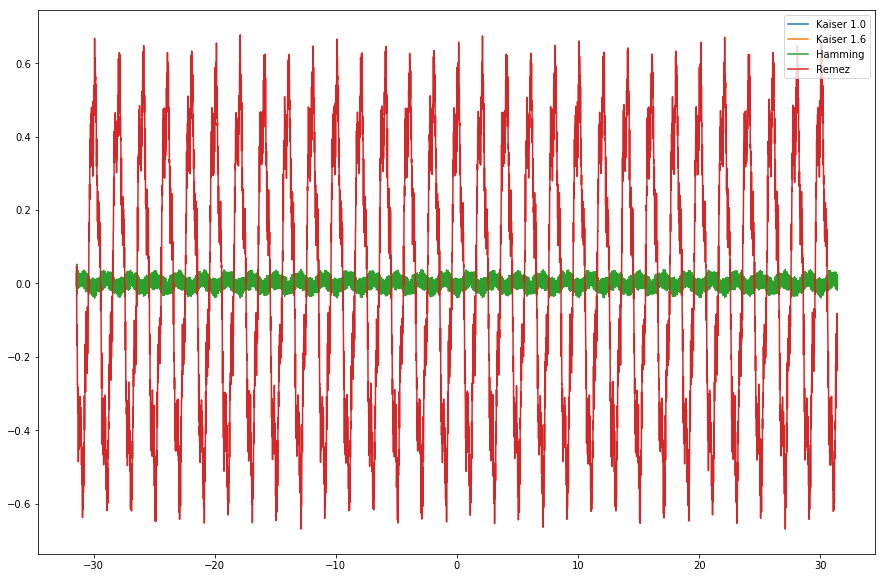

In [237]:
figure(5, figsize=(15, 10))
clf()
plot(t,lfilter(taps_kaiser10,1.0,x), label="Kaiser 1.0")
plot(t,lfilter(taps_kaiser16,1.0,x), label="Kaiser 1.6")
plot(t,lfilter(taps_hamming,1.0,x), label="Hamming")
plot(t,lfilter(taps_remez,1.0,x), label="Remez")
legend()
show()

In [264]:
import sounddevice as sd
sd.play(ultimateRemez,18000)

In [266]:
import soundfile as sf
filename = 'myfile.wav'